<a href="https://colab.research.google.com/github/AlaynLado/FraudDetectionML/blob/main/M%C3%A9todo_para_la_detecci%C3%B3n_de_fraudes_en_transacciones_bancarias_con_escenarios_de_Flujo_de_Datos%2C_Alayn_Lado_Chaviano%2C_Leonardo_Gonz%C3%A1lez_Abreu_F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías**

In [ ]:
%pip install incremental_trees


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 7.6 MB/s 


In [ ]:
import io
import scipy as sp
import numpy as np # álgebra lineal
import pandas as pd # procesamiento de datos
import matplotlib.pyplot as plt # gáficos básicos
import seaborn as sns # gráficos avanzados

from sklearn.model_selection import train_test_split # división de datos
from sklearn.preprocessing import StandardScaler # normalización de datos
from sklearn.neural_network import MLPClassifier # modelo	Artificial Neural Network 
from sklearn.tree import DecisionTreeClassifier # modelo Decision Tree
from sklearn.ensemble import GradientBoostingClassifier # modelo Gradient Boosting
from sklearn.ensemble import IsolationForest # modelo Isolation Forest
from sklearn.neighbors import KNeighborsClassifier # modelo	K-Nearest Neighbors 
from sklearn.linear_model import LogisticRegression # modelo Logistic Regression
from sklearn.naive_bayes import GaussianNB # modelo	Naïve Baiyes Classifier 
from sklearn.ensemble import RandomForestClassifier # modelo Random Forest Classifier
from sklearn.svm import SVC # modelo	Support Vector Machine 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve, make_scorer# evaluación de métricas
from sklearn.pipeline import Pipeline # sikit learn pipline
from sklearn.pipeline import make_pipeline # sikit learn pipline
from sklearn.model_selection import GridSearchCV, ShuffleSplit # cross validation
from sklearn import model_selection,linear_model,decomposition
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics

#model = StreamingRFC(spf_n_fits=math.inf)
from incremental_trees.models.classification.streaming_rfc import StreamingRFC
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling._smote.base import SMOTE
from collections import Counter

# **Limpieza / Preprocesamiento y Transformación de los datos**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


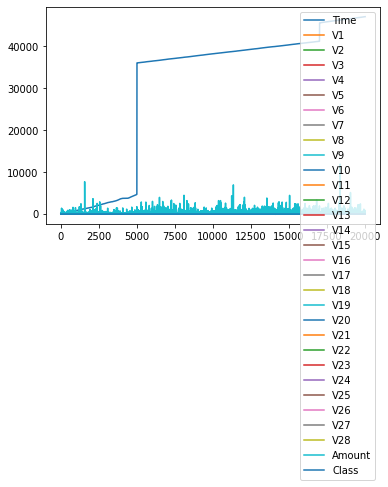

In [ ]:
df.plot()

plt.show()

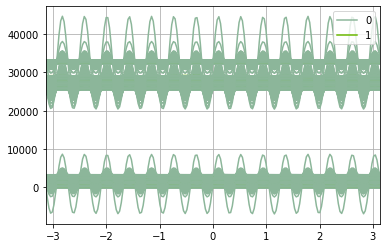

In [ ]:
from pandas.plotting import andrews_curves
plt.figure();
andrews_curves(df, "Class");

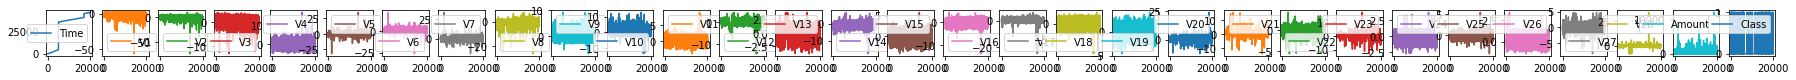

In [ ]:
df.plot(subplots=True, layout=(31, 31), figsize=(31, 31), sharex=False);

Se busca una información más general del conjunto de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  int64  
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     20000 non-null  float64
 22

Tratamiento de los datos **(Preprocesamiento)**:

In [ ]:
# visualizar si existen datos duplicados
df [df.duplicated() == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,45971,1.289497,0.107352,0.198329,0.637300,-0.080349,-0.213012,0.011484,-0.123796,0.411247,...,-0.278204,-0.581097,-0.100286,-0.390937,0.590368,0.318255,-0.018919,0.006222,7.98,0
17767,45971,1.289478,0.107320,0.198318,0.637309,-0.080359,-0.213008,0.011497,-0.123798,0.411246,...,-0.278198,-0.581103,-0.100295,-0.390937,0.590364,0.318254,-0.018921,0.006224,7.99,0
18650,46387,-2.525765,1.934136,0.803184,1.571913,-1.621559,0.981111,-1.486179,2.180808,-0.069379,...,-0.148983,-0.410374,0.095628,0.024774,0.047707,-0.402202,-0.213922,-0.042551,9.90,0
18651,46387,-2.525765,1.934136,0.803184,1.571913,-1.621559,0.981111,-1.486179,2.180808,-0.069379,...,-0.148983,-0.410374,0.095628,0.024774,0.047707,-0.402202,-0.213922,-0.042551,9.90,0


In [ ]:
# eliminar las filas duplicadas
df1 = df.drop_duplicates()

In [ ]:
# re-check: visualizar si existen datos duplicados
df1 [df1.duplicated() == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
# visualizar si existen valores nulos
nulls = df.isna().sum() # contar valores nulos en cada columna
df_nulls = pd.DataFrame(nulls) # convertir el resultado en un dataframe
df_nulls.transpose() # transponer el marco de datos e imprimir el resultado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# visualizar si existen valores atípicos
int_vars = df1[["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount", "Class"]]
sns.pairplot(int_vars, hue = "Class")
plt.show()

In [ ]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,47051,1.254059,-0.786311,0.286283,-0.666334,-0.951138,-0.389992,-0.560189,-0.024899,-0.790512,...,0.040335,-0.060404,-0.100546,0.024825,0.457905,-0.304989,-0.008119,0.012787,75.44,0
19996,47052,-1.883323,0.104475,1.931791,-3.691559,-0.196086,1.630184,-0.391184,1.133396,2.757721,...,-0.134996,0.395790,-0.229124,-1.004798,0.596717,-0.950903,0.115782,-0.134574,7.74,0
19997,47052,1.184662,-0.216035,0.651774,-0.168070,-0.769154,-0.379905,-0.482859,0.188342,0.333287,...,-0.058520,-0.224482,0.157778,0.247821,-0.060009,0.908928,-0.066832,-0.005374,0.77,0
19998,47053,0.829086,-0.420209,-0.323887,1.118331,-0.078426,-0.392259,0.545886,-0.259599,-0.032113,...,0.124450,-0.134035,-0.422629,-0.422666,0.719097,-0.303521,-0.031901,0.055239,250.00,0


# **Resultado**



» Los datos no tienen valores nulos.

»Todas las características están en el tipo correcto.

»Se descartaron las filas duplicadas.

» Se encontraron valores atípicos los cuales son el objetivo de este proyecto.

Ahora los datos están libres de errores y listos para construir el pipeline.

In [ ]:
df1.to_csv('creditcard.csv')
from google.colab import files
files.download('creditcard.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Ajuste de parámetros con GridSearchCV:**

In [ ]:
# Dividimos los datos en entrenamiento y prueba
df_training = df1.head(int(len(df1) * 0.8))
y_train = df_training['Class']
X_train = df_training.drop('Class', axis=1)
df_test = df.drop(df_training.index)
y_test = df_test['Class']
X_test = df_test.drop('Class', axis=1)
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))
# Mostramos los datos de la columna 'Class' para el conjunto de prueba
y_test.value_counts()

Ejemplos usados para entrenar:  15924
Ejemplos usados para test:  4076


0    4058
1      18
Name: Class, dtype: int64

# **Manejando los datos desbalanceados:**

In [ ]:
#SMOTE: Synthetic Minority Oversampling Technique
counter=Counter(y_train)
print('Antes', counter)
# oversampling the train dataset using SMOTE
smt=SMOTE(random_state=0)
# X_train, y_train=smt.fit_resample(X_train, y_train) 
X_train_sm, y_train_sm=smt.fit_resample(X_train, y_train) 

counter=Counter(y_train_sm)
print('Después', counter)

Antes Counter({0: 15878, 1: 46})
Después Counter({0: 15878, 1: 15878})


#**Ajuste de parámetros con GridSearchCV para el algoritmo K-Nearest Neighbors.** 

In [ ]:
# Iniciamos el modelo
knn = KNeighborsClassifier()

In [ ]:
# operaciones en orden
operations =  [('knn', knn)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador knn
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

Leyenda » tn:  4051 fp:  7 fn:  18 tp:  0


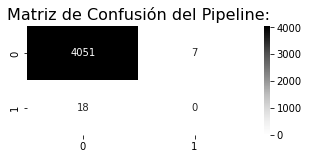

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# modificaremos el 'n_neighbors'
k_values = list(range(1,100))
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [ ]:
# establecer el parámetro del grid
param_grid = {'knn__n_neighbors' : k_values} # podemos añadir cualquier otro parámetro (to be tuned) 

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring=scoring, refit='sensitivity')
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)})

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'knn': KNeighborsClassifier(n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=1))])

El mejor rendimiento está asociado a KNeighborsClassifier(n_neighbors=1)

In [ ]:
# iniciar y configurar las operaciones
knn2 = KNeighborsClassifier(n_neighbors=1)
operations = [('knn2', knn2)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('knn2', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
knn_auc=roc_auc_score(y_test, knn2.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, knn2.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, knn2.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, knn2.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, knn2.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(knn_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  4058
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955839057899902
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.5
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


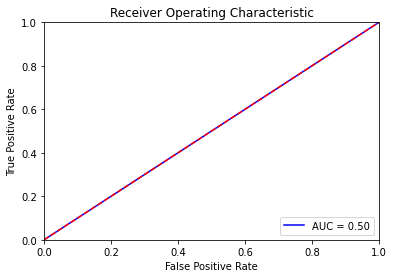

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = knn2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Ajuste de parámetros con GridSearchCV para el algoritmo Decision Trees Classifier.** 

In [ ]:
# Iniciamos el modelo
dtree_model = DecisionTreeClassifier(random_state=0)

In [ ]:
# operaciones en orden
operations =  [('dtree_model', dtree_model)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador DT
dtree_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

Leyenda » tn:  4046 fp:  12 fn:  10 tp:  8


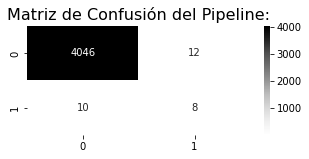

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# establecer el parámetro del grid
param_grid = {'criterion':['gini','entropy'],'max_depth':range(1,150,1)} 

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(dtree_model, param_grid, cv=5, scoring=scoring, refit='sensitivity')
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 150)},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)})

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 23,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
full_cv_classifier.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=23, random_state=0)

El mejor rendimiento está asociado a DecisionTreeClassifier(criterion='entropy', max_depth=23, random_state=0)

In [ ]:
# iniciar y configurar las operaciones
dtree_model4 = DecisionTreeClassifier(criterion='entropy', max_depth=23, random_state=0)
operations = [('dtree_model4', dtree_model4)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('dtree_model4',
                 DecisionTreeClassifier(criterion='entropy', max_depth=23,
                                        random_state=0))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
dt_auc=roc_auc_score(y_test, dtree_model4.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, dtree_model4.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, dtree_model4.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, dtree_model4.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, dtree_model4.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(dt_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)   
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  4004
fp :  54
fn :  7
tp :  11
(accuracy_score) =  0.9850343473994112
(precision_score) =  0.16923076923076924
(recall_score) =  0.6111111111111112
(f1_score) =  0.2650602409638554
(auc_score) =  0.8004832703575927
specificity :  0.9866929521931986
sensitivity :  0.6111111111111112
G-Mean  :  0.7765172414958268


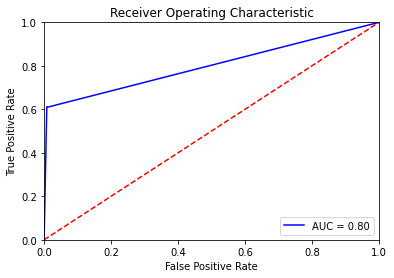

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = dtree_model4.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#plot model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=23, random_state=0)
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=23, random_state=0)

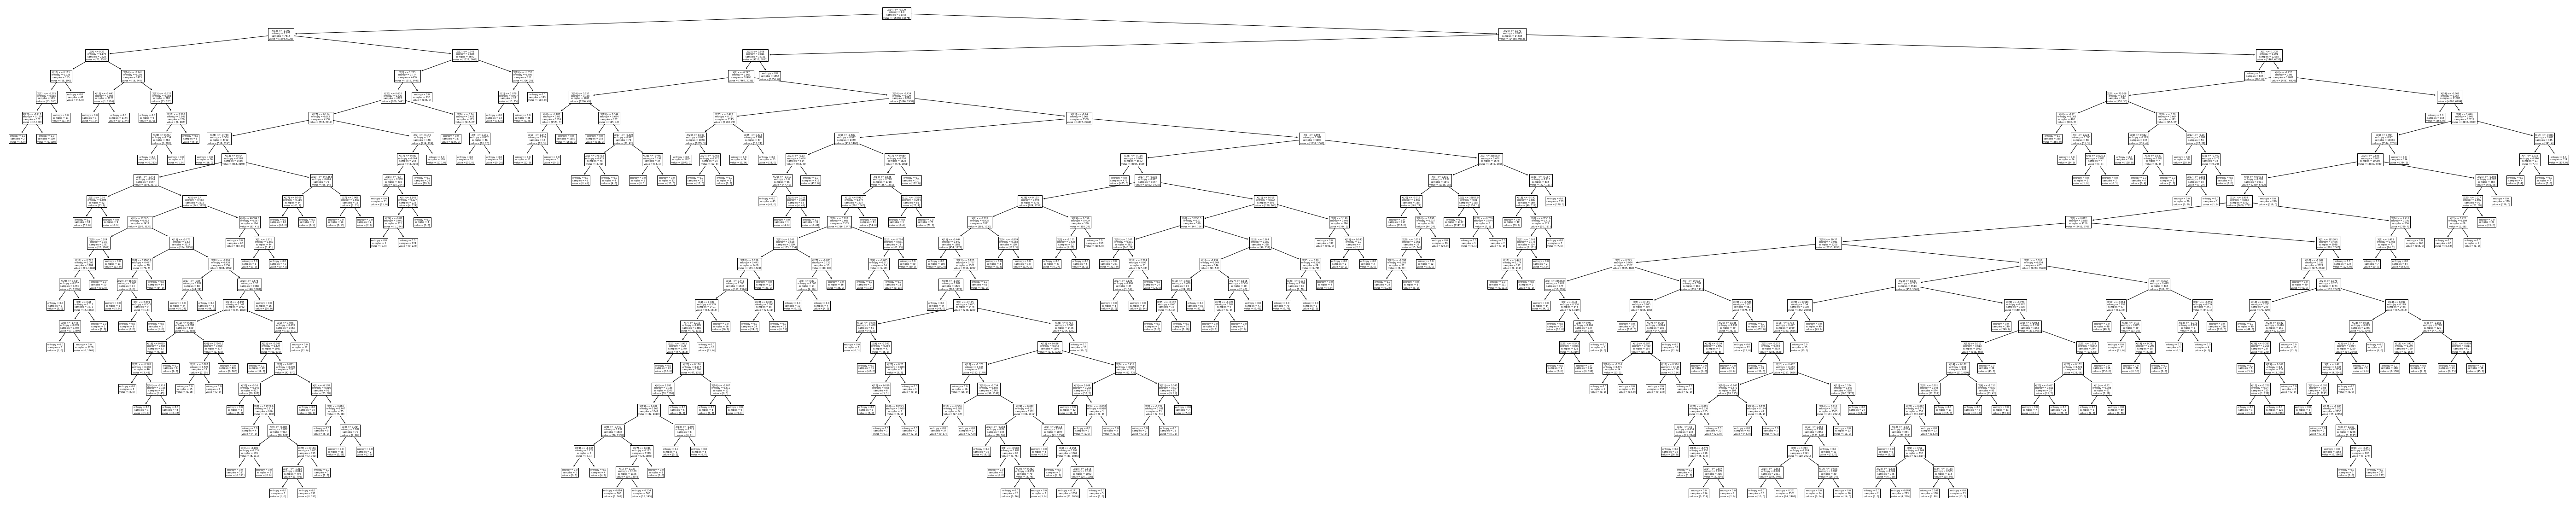

In [ ]:
fig = plt.figure(figsize=(100,20))
_ = tree.plot_tree(dt)

#**Ajuste de parámetros con GridSearchCV para el algoritmo Naïve Baiyes Classifier.** 

In [ ]:
# Iniciamos el modelo
nb_classifier = GaussianNB()

In [ ]:
# operaciones en orden
operations =  [('nb_classifier', nb_classifier)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador NBC
nb_classifier.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

Leyenda » tn:  3875 fp:  183 fn:  6 tp:  12


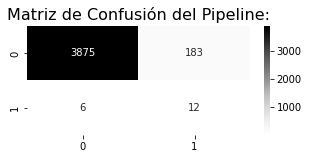

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# establecer el parámetro del grid
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(estimator=nb_classifier, param_grid=params_NB, cv=5, scoring=scoring, refit='sensitivity')
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)})

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'priors': None, 'var_smoothing': 5.3366992312063123e-05}

In [ ]:
full_cv_classifier.best_estimator_

GaussianNB(var_smoothing=5.3366992312063123e-05)

El mejor rendimiento está asociado a GaussianNB(var_smoothing=5.3366992312063123e-05)

In [ ]:
# iniciar y configurar las operaciones
nb_classifier8 = GaussianNB(var_smoothing=5.3366992312063123e-05)
operations = [('nb_classifier8', nb_classifier8)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('nb_classifier8',
                 GaussianNB(var_smoothing=5.3366992312063123e-05))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nbc_auc=roc_auc_score(y_test, nb_classifier8.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, nb_classifier8.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, nb_classifier8.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, nb_classifier8.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, nb_classifier8.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(nbc_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)   
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  318
fp :  3740
fn :  2
tp :  16
(accuracy_score) =  0.08194308145240432
(precision_score) =  0.004259850905218318
(recall_score) =  0.8888888888888888
(f1_score) =  0.008479067302596715
(auc_score) =  0.41740594710037787
specificity :  0.07836372597338591
sensitivity :  0.8888888888888888
G-Mean  :  0.2639254540768593


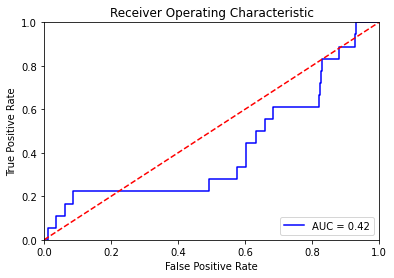

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = nb_classifier8.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Ajuste de parámetros con GridSearchCV para el algoritmo Support Vector Machine.** 

In [ ]:
# Iniciamos el modelo
model = SVC(random_state=0)

In [ ]:
# operaciones en orden
operations =  [('model', model)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador SVM
model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Leyenda » tn:  4028 fp:  30 fn:  18 tp:  0


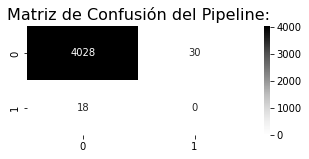

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# establecer el parámetro del grid
params_SVM = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(estimator=model, param_grid=params_SVM, cv=5, scoring=scoring, refit='sensitivity', verbose = 3)
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf; sensitivity: (test=0.021) specificity: (test=1.000) total time= 1.0min
[CV 2/5] END C=0.1, gamma=1, kernel=rbf; sensitivity: (test=0.088) specificity: (test=1.000) total time=  56.6s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf; sensitivity: (test=0.325) specificity: (test=1.000) total time=  54.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf; sensitivity: (test=0.013) specificity: (test=1.000) total time=  54.5s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf; sensitivity: (test=0.011) specificity: (test=1.000) total time=  55.1s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf; sensitivity: (test=0.092) specificity: (test=1.000) total time=  58.0s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf; sensitivity: (test=0.083) specificity: (test=1.000) total time=  56.3s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf; sensitivity: (test=0.114) specificity: (test=1.000) total time=  55.9s
[CV 4/5] END C=0.1, gamma=0.1, kerne

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=3)

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'C': 1000,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
full_cv_classifier.best_estimator_

SVC(C=1000, gamma=0.0001, random_state=0)

El mejor rendimiento está asociado a SVC(C=1000, gamma=0.0001, random_state=0)




In [ ]:
# iniciar y configurar las operaciones
# Para que este método funcione debemos modificar el parámetro 'probability' a  probability=True
modelCG2 = SVC(C=1000, gamma=0.0001, random_state=0, probability=True)
operations = [('modelCG2', modelCG2)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('modelCG2',
                 SVC(C=1000, gamma=0.0001, probability=True, random_state=0))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
svm_auc=roc_auc_score(y_test, modelCG2.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, modelCG2.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, modelCG2.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, modelCG2.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, modelCG2.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(svm_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)    

tn :  4058
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955839057899902
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.48706259241005423
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


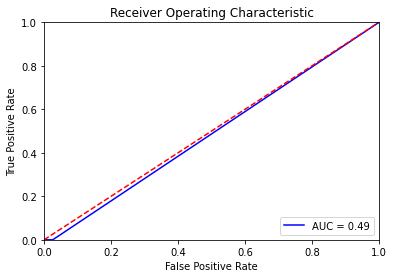

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = modelCG2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Ajuste de parámetros con GridSearchCV para el algoritmo Logistic Regression.** 

In [ ]:
#PCA()
pca = decomposition.PCA()
# Iniciamos el modelo
logistic_Reg = linear_model.LogisticRegression(random_state=0)

In [ ]:
# operaciones en orden
operations =  [('pca', pca), ('logistic_Reg', logistic_Reg)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador LR
logistic_Reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

Leyenda » tn:  3441 fp:  617 fn:  6 tp:  12


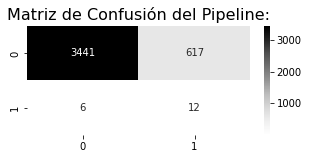

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# modificaremos el 'n_components '
n_components = list(range(1,X_train.shape[1]+1,1))
n_components

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [ ]:
# La regresión logística requiere que GridSearchCV optimice dos parámetros 'C' y 'penalty'. 
# Así que hemos establecido estos dos parámetros como una lista de valores de los cuales GridSearchCV seleccionará el mejor valor del parámetro.
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [ ]:
# Ahora estamos creando un diccionario para establecer todas las opciones de parámetros para diferentes módulos.
parameters = dict(pca__n_components=n_components, logistic_Reg__C=C,  logistic_Reg__penalty=penalty)

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Hacer un objeto clf_GS para GridSearchCV y ajustar el conjunto de datos, es decir, X e y
clf_GS = GridSearchCV(pipe, parameters, cv=5, scoring=scoring, refit='sensitivity')
clf_GS.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic_Reg',
                                        LogisticRegression(random_state=0))]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.3257...
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30]},
             refit='sens

In [ ]:
# Mejores parámetros del modelo
clf_GS.best_estimator_.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=29)),
  ('logistic_Reg', LogisticRegression(C=109.85411419875572, random_state=0))],
 'verbose': False,
 'pca': PCA(n_components=29),
 'logistic_Reg': LogisticRegression(C=109.85411419875572, random_state=0),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 29,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logistic_Reg__C': 109.85411419875572,
 'logistic_Reg__class_weight': None,
 'logistic_Reg__dual': False,
 'logistic_Reg__fit_intercept': True,
 'logistic_Reg__intercept_scaling': 1,
 'logistic_Reg__l1_ratio': None,
 'logistic_Reg__max_iter': 100,
 'logistic_Reg__multi_class': 'auto',
 'logistic_Reg__n_jobs': None,
 'logistic_Reg__penalty': 'l2',
 'logistic_Reg__random_state': 0,
 'logistic_Reg__solver': 'lbfgs',
 'logistic_Reg__tol': 0.0001,
 'logistic_Reg__verbose': 0,
 'logistic_Reg__warm_start': False}

In [ ]:
clf_GS.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=29)),
                ('logistic_Reg',
                 LogisticRegression(C=109.85411419875572, random_state=0))])

El mejor rendimiento está asociado a LogisticRegression(C=109.85411419875572, random_state=0)

In [ ]:
# iniciar y configurar las operaciones
logistic_RegC2 = linear_model.LogisticRegression(C=109.85411419875572, random_state=0)
operations = [('logistic_RegC2', logistic_RegC2)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('logistic_RegC2',
                 LogisticRegression(C=109.85411419875572, random_state=0))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lr_auc=roc_auc_score(y_test, logistic_RegC2.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, logistic_RegC2.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, logistic_RegC2.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, logistic_RegC2.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, logistic_RegC2.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(lr_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)    

tn :  3618
fp :  440
fn :  5
tp :  13
(accuracy_score) =  0.8908243375858685
(precision_score) =  0.02869757174392936
(recall_score) =  0.7222222222222222
(f1_score) =  0.05520169851380042
(auc_score) =  0.7885247248233941
specificity :  0.8915722030556925
sensitivity :  0.7222222222222222
G-Mean  :  0.8024420588194793


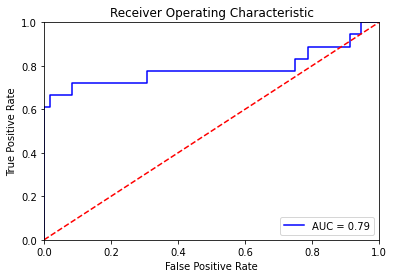

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = logistic_RegC2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Ajuste de parámetros con GridSearchCV para el algoritmo Artificial Neural Network.** 

In [ ]:
# Iniciamos el modelo
mlp = MLPClassifier(max_iter=100, random_state=0)

In [ ]:
# operaciones en orden
operations =  [('mlp', mlp)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador LR
mlp.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Leyenda » tn:  4054 fp:  4 fn:  9 tp:  9


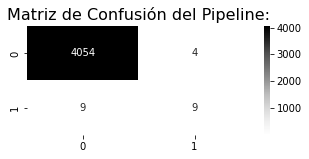

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predºict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# establecer el parámetro del grid
parameter_space = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(mlp, parameter_space, cv=3, scoring=scoring, refit='sensitivity', verbose=3)
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; sensitivity: (test=0.052) specificity: (test=0.972) total time=   7.5s
[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; sensitivity: (test=0.067) specificity: (test=1.000) total time=   8.9s
[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; sensitivity: (test=0.082) specificity: (test=1.000) total time=   9.0s
[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; sensitivity: (test=0.228) specificity: (test=0.776) total time=   5.5s
[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; sensitivity: (test=0.130) specificity: (test=1.000) total time=  14.2s
[CV 3/3] END act

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=0),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=3)

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
full_cv_classifier.best_estimator_

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              max_iter=100, random_state=0, solver='sgd')

El mejor rendimiento está asociado a MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', max_iter=100, random_state=0, solver='sgd')

In [ ]:
# iniciar y configurar las operaciones
mlpC = MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', max_iter=100, random_state=0, solver='sgd')
operations = [('mlpC', mlpC)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('mlpC',
                 MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                               learning_rate='adaptive', max_iter=100,
                               random_state=0, solver='sgd'))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
mlp_auc=roc_auc_score(y_test, mlpC.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, mlpC.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, mlpC.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, mlpC.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, mlpC.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(mlp_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  0
fp :  4058
fn :  0
tp :  18
(accuracy_score) =  0.004416094210009814
(precision_score) =  0.004416094210009814
(recall_score) =  1.0
(f1_score) =  0.008793356130923304
(auc_score) =  0.5
specificity :  0.0
sensitivity :  1.0
G-Mean  :  0.0


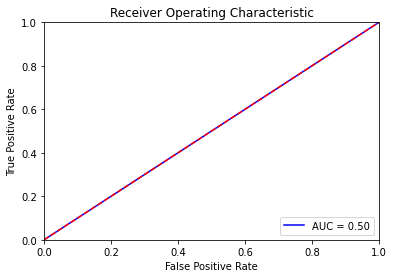

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = mlpC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Ajuste de parámetros con GridSearchCV para el algoritmo Random Forest.** 

In [ ]:
# Iniciamos el modelo
model = StreamingRFC(random_state=0)

In [ ]:
# operaciones en orden
operations =  [('model', model)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador RFC
model.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'dask_feeding', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_n_estimators', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators_per_chunk', 'n_jobs', 'oob_score', 'random_state', 'spf_n_fits', 'spf_sample_prop', 'verbose', 'warm_start'])

Leyenda » tn:  3965 fp:  93 fn:  7 tp:  11


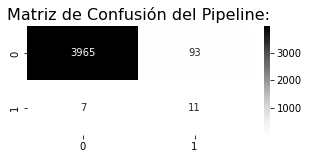

In [ ]:
# entrenamiento del pipeline
import warnings
warnings.filterwarnings('ignore')
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# establecer el parámetro del grid
param_grid = {'max_depth'   : range(1,150,1), 'min_samples_leaf': [0, 0.025,0.05, 0.075, 0.1], 'max_features': ['sqrt', 'log2']}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(estimator  = model, param_grid = param_grid, cv = 5, scoring=scoring, refit='sensitivity', verbose=3)
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

Se han truncado las últimas 5000 líneas del flujo de salida.
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0.025; sensitivity: (test=0.755) specificity: (test=0.072) total time=   0.1s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=0.025; sensitivity: (test=0.728) specificity: (test=0.536) total time=

GridSearchCV(cv=5, estimator=StreamingRFC(random_state=0),
             param_grid={'max_depth': range(1, 150),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0, 0.025, 0.05, 0.075, 0.1]},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=3)

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'dask_feeding': True,
 'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_n_estimators': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.025,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators_per_chunk': 1,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'spf_n_fits': 100,
 'spf_sample_prop': 0.1,
 'verbose': 0,
 'warm_start': True}

In [ ]:
full_cv_classifier.best_estimator_

StreamingRFC(max_depth=4, max_features='log2', min_samples_leaf=0.025,
             random_state=0)

El mejor rendimiento está asociado a StreamingRFC(max_depth=4, max_features='log2', min_samples_leaf=0.025, random_state=0)



In [ ]:
# iniciar y configurar las operaciones
modelRFC = StreamingRFC(max_depth=4, max_features='log2', min_samples_leaf=0.025, random_state=0)
operations = [('modelRFC', modelRFC)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('modelRFC',
                 StreamingRFC(max_depth=4, max_features='log2',
                              min_samples_leaf=0.025, random_state=0))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
rfc_auc=roc_auc_score(y_test, modelRFC.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, modelRFC.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, modelRFC.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, modelRFC.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, modelRFC.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(rfc_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  1979
fp :  2079
fn :  3
tp :  15
(accuracy_score) =  0.4892051030421982
(precision_score) =  0.0071633237822349575
(recall_score) =  0.8333333333333334
(f1_score) =  0.014204545454545456
(auc_score) =  0.8222851979628717
specificity :  0.48767865943814687
sensitivity :  0.8333333333333334
G-Mean  :  0.6374942218288119


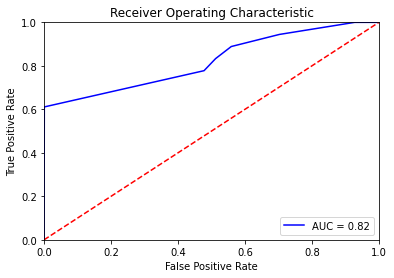

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = modelRFC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#plot model
rf = RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=0.025, random_state=0)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=0.025,
                       random_state=0)

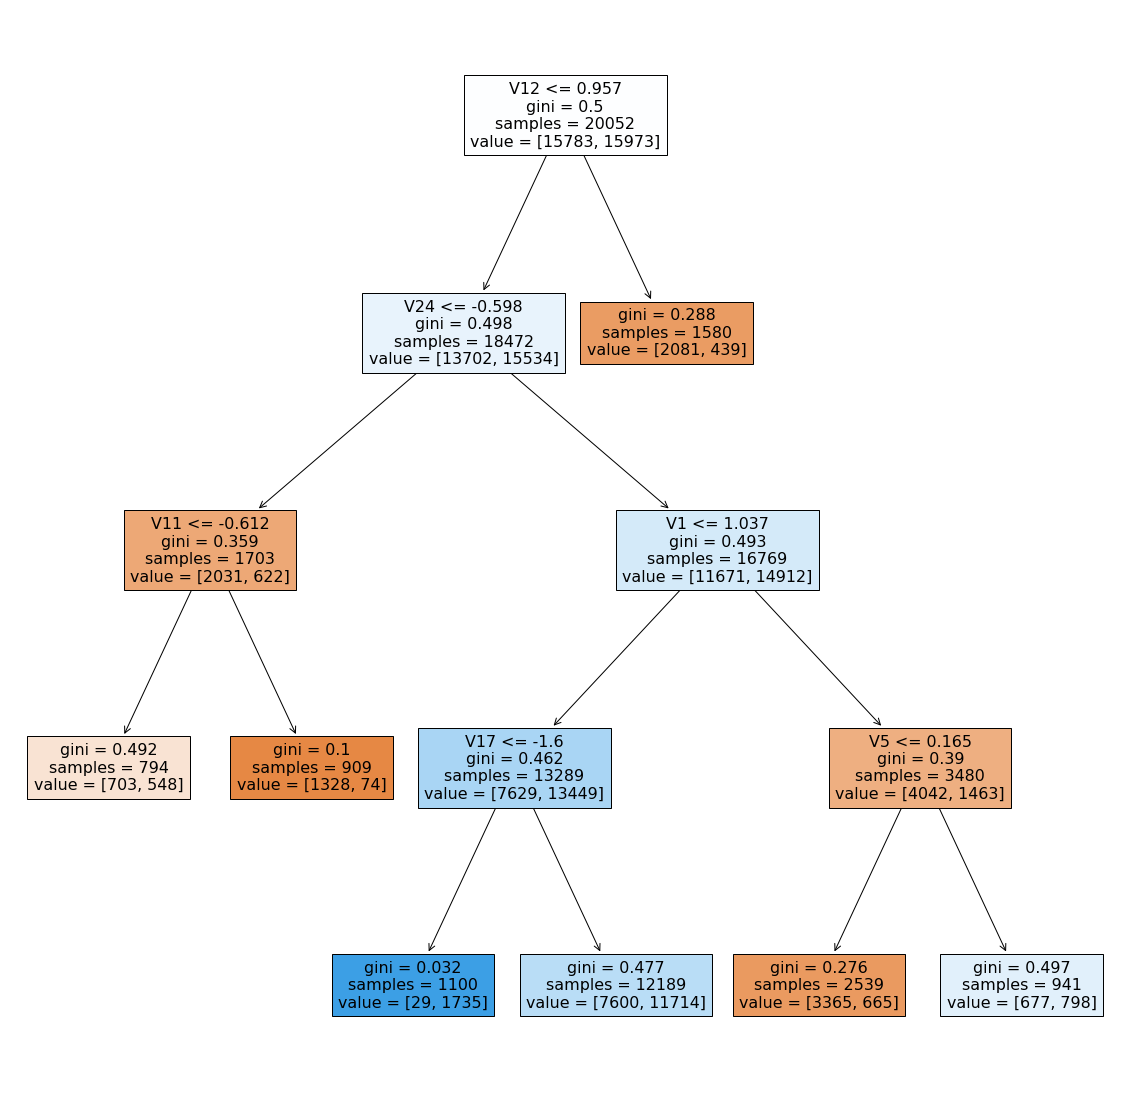

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train_sm.columns, filled=True)

#**Ajuste de parámetros con GridSearchCV para el algoritmo Isolation Forest** 

In [ ]:
# Iniciamos el modelo
model_isf = IsolationForest(random_state=0)

In [ ]:
# operaciones en orden
operations =  [('model_isf', model_isf)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador RFC
model_isf.get_params().keys()

dict_keys(['bootstrap', 'contamination', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'random_state', 'verbose', 'warm_start'])

Leyenda » tn:  3905 fp:  153 fn:  9 tp:  9


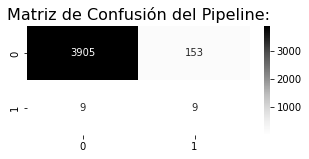

In [ ]:
# entrenamiento del pipeline
import warnings
warnings.filterwarnings('ignore')
model_isf.fit(X_train_sm, y_train_sm)
y_pred = pd.Series(model_isf.predict(X_test))
y_pred = y_pred.map({1: 0, -1: 1})
tn, fp, fn, tp = confusion_matrix(y_test.round(), y_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test.round(), y_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# establecer el parámetro del grid
param_grid = {'n_estimators': range(10, 50, 10), "max_features": range(8, 28, 10)}

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
import warnings
warnings.filterwarnings('ignore')
full_cv_classifier = GridSearchCV(model_isf, param_grid, cv=5, scoring=scoring, refit='sensitivity', verbose=3)
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_features=8, n_estimators=10; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 2/5] END max_features=8, n_estimators=10; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 3/5] END max_features=8, n_estimators=10; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 4/5] END max_features=8, n_estimators=10; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 5/5] END max_features=8, n_estimators=10; sensitivity: (test=nan) specificity: (test=nan) total time=   0.0s
[CV 1/5] END max_features=8, n_estimators=20; sensitivity: (test=nan) specificity: (test=nan) total time=   0.1s
[CV 2/5] END max_features=8, n_estimators=20; sensitivity: (test=nan) specificity: (test=nan) total time=   0.1s
[CV 3/5] END max_features=8, n_estimators=20; sensitivity: (test=nan) specificity: (test=nan) total time=   0.1s
[CV 4/5] END max_features=8, n_estim

GridSearchCV(cv=5, estimator=IsolationForest(random_state=0),
             param_grid={'max_features': range(8, 28, 10),
                         'n_estimators': range(10, 50, 10)},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=3)

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 8,
 'max_samples': 'auto',
 'n_estimators': 10,
 'n_jobs': None,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
full_cv_classifier.best_estimator_

IsolationForest(max_features=8, n_estimators=10, random_state=0)

El mejor rendimiento está asociado a IsolationForest(max_features=8, n_estimators=10, random_state=0)

In [ ]:
# iniciar y configurar las operaciones
modelIF = IsolationForest(max_features=8, n_estimators=10, random_state=0)
operations = [('modelIF', modelIF)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('modelIF',
                 IsolationForest(max_features=8, n_estimators=10,
                                 random_state=0))])

In [ ]:
# predicción con el conjunto de prueba
y_pred = pd.Series(modelIF.predict(X_test))
y_pred = y_pred.map({1: 0, -1: 1})

In [ ]:
import warnings
warnings.filterwarnings('ignore')
if_auc=roc_auc_score(y_test, pipe.predict(X_test))
tn, fp, fn, tp = confusion_matrix(y_test.round(), y_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, modelIF.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test.round(), y_pred, average='binary')  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test.round(),y_pred ,average='binary')
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test.round(), y_pred, average='binary')
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(if_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3691
fp :  367
fn :  7
tp :  11
(accuracy_score) =  0.0017173699705593719
(precision_score) =  0.0291005291005291
(recall_score) =  0.6111111111111112
(f1_score) =  0.05555555555555556
(auc_score) =  0.23966376430644545
specificity :  0.909561360275998
sensitivity :  0.6111111111111112
G-Mean  :  0.7455488270408578


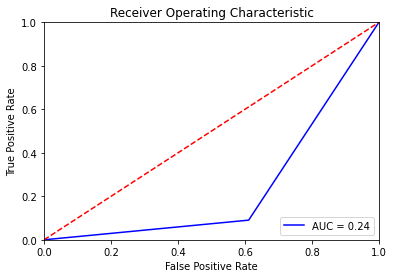

AUC: 0.2396637643064454


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.round(), y_pred, pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
# Graficar roc_curve 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

# Imprimir valor del AUC
if_auc = np.trapz(tpr,fpr)
print('AUC:', if_auc)

In [ ]:
#plot model
iforst = IsolationForest(max_features=8, n_estimators=10, random_state=0)
iforst.fit(X_train_sm, y_train_sm)

IsolationForest(max_features=8, n_estimators=10, random_state=0)

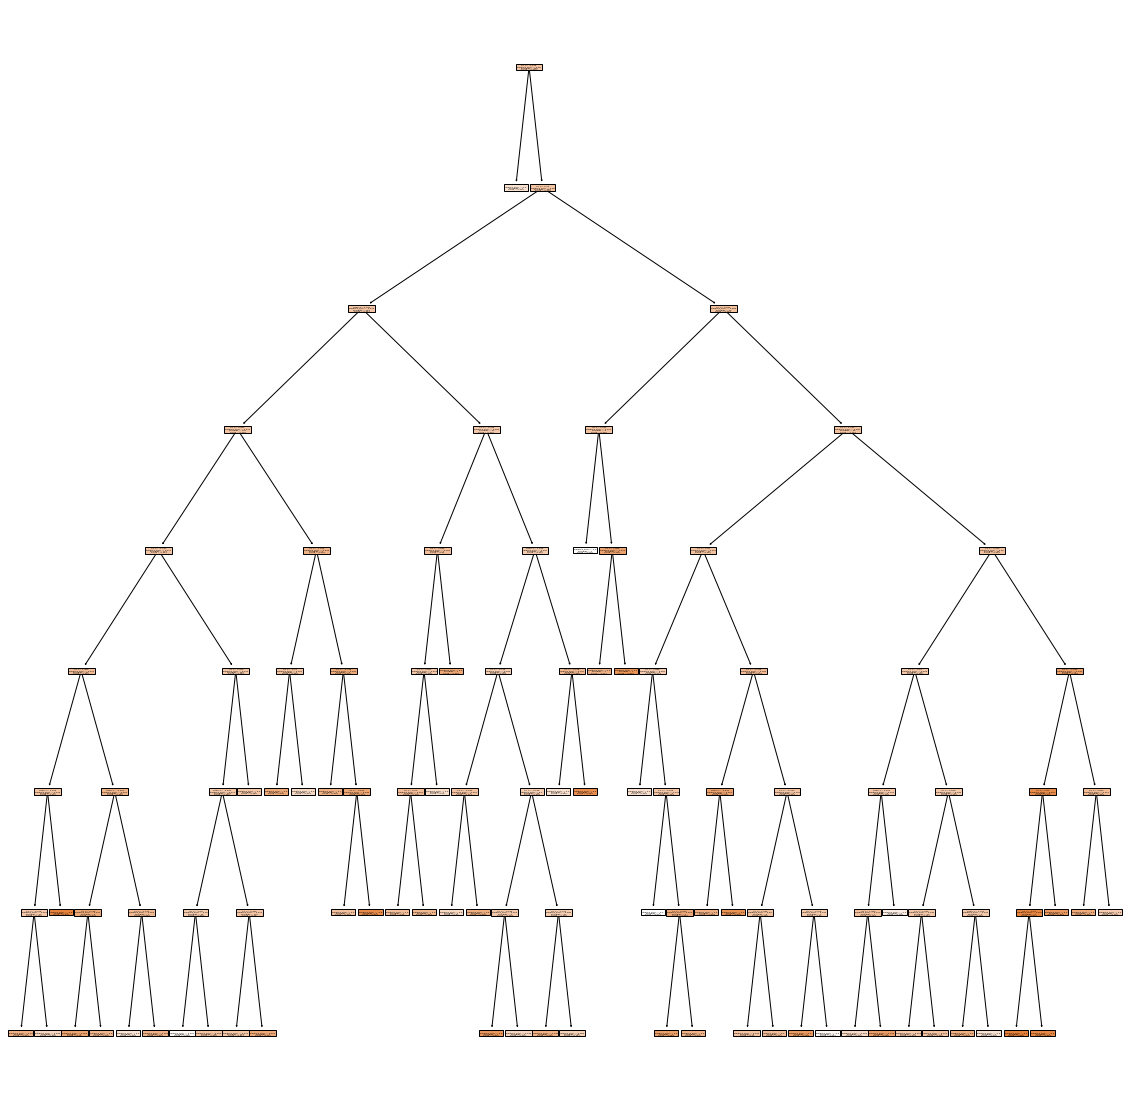

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(iforst.estimators_[0], feature_names=X_train_sm.columns, filled=True)

#**Ajuste de parámetros con GridSearchCV para el algoritmo Gradient Boosting** 

In [ ]:
# Iniciamos el modelo
model =GradientBoostingClassifier(random_state=0)

In [ ]:
# operaciones en orden
operations =  [('model', model)] # Observe que están escritos en tuplas dentro de una lista
# configurar el pipeline
pipe = Pipeline(operations) 

In [ ]:
# Estos son los parámetros que se pueden modificar en el clasificador GBC
model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Leyenda » tn:  3978 fp:  80 fn:  7 tp:  11


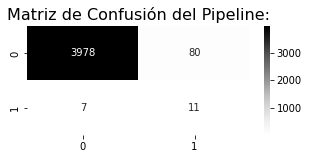

In [ ]:
# entrenamiento del pipeline
import warnings
warnings.filterwarnings('ignore')
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('Leyenda »', 'tn: ', tn, 'fp: ', fp, 'fn: ', fn, 'tp: ', tp)
plt.figure(figsize=(5,2))
plt.title("Matriz de Confusión del Pipeline:", fontsize=16)
sns.heatmap(confusion_matrix(y_test, pipe_pred), annot=True, cmap='Greys', fmt='.0f')
plt.show();

In [ ]:
# establecer el parámetro del grid
parameters = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1], 
              'min_samples_split':[2,5,10,20], 
              'max_depth':[2,3,5,10]}

In [ ]:
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [ ]:
# Poniendo todo junto
full_cv_classifier = GridSearchCV(model, parameters, cv=3, scoring=scoring, refit='sensitivity', verbose=3)
# Entrenamos el Pipeline
full_cv_classifier.fit(X_train_sm, y_train_sm.values.ravel())

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END learning_rate=0.01, max_depth=2, min_samples_split=2; sensitivity: (test=0.680) specificity: (test=0.166) total time=  16.5s
[CV 2/3] END learning_rate=0.01, max_depth=2, min_samples_split=2; sensitivity: (test=0.696) specificity: (test=0.747) total time=  16.5s
[CV 3/3] END learning_rate=0.01, max_depth=2, min_samples_split=2; sensitivity: (test=0.670) specificity: (test=0.000) total time=  16.3s
[CV 1/3] END learning_rate=0.01, max_depth=2, min_samples_split=5; sensitivity: (test=0.680) specificity: (test=0.166) total time=  16.4s
[CV 2/3] END learning_rate=0.01, max_depth=2, min_samples_split=5; sensitivity: (test=0.696) specificity: (test=0.747) total time=  16.5s
[CV 3/3] END learning_rate=0.01, max_depth=2, min_samples_split=5; sensitivity: (test=0.670) specificity: (test=0.000) total time=  16.4s
[CV 1/3] END learning_rate=0.01, max_depth=2, min_samples_split=10; sensitivity: (test=0.680) specificity: (te

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             refit='sensitivity',
             scoring={'sensitivity': make_scorer(recall_score),
                      'specificity': make_scorer(recall_score, pos_label=0)},
             verbose=3)

In [ ]:
# Mejores parámetros del modelo
full_cv_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
full_cv_classifier.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=10, min_samples_split=10,
                           random_state=0)

El mejor rendimiento está asociado a GradientBoostingClassifier(learning_rate=1, max_depth=10, min_samples_split=10, random_state=0)

In [ ]:
# iniciar y configurar las operaciones
modelGBC = GradientBoostingClassifier(learning_rate=1, max_depth=10, min_samples_split=10, random_state=0)
operations = [('modelGBC', modelGBC)]

In [ ]:
# configurar el pipeline
pipe = Pipeline(operations)

In [ ]:
# entrenamiento del pipeline
pipe.fit(X_train_sm, y_train_sm)

Pipeline(steps=[('modelGBC',
                 GradientBoostingClassifier(learning_rate=1, max_depth=10,
                                            min_samples_split=10,
                                            random_state=0))])

In [ ]:
# predicción con el conjunto de prueba
pipe_pred = pipe.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
gbc_auc=roc_auc_score(y_test, modelGBC.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, modelGBC.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, modelGBC.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, modelGBC.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, modelGBC.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(gbc_auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4056
fp :  2
fn :  15
tp :  3
(accuracy_score) =  0.995829244357213
(precision_score) =  0.6
(recall_score) =  0.16666666666666666
(f1_score) =  0.2608695652173913
(auc_score) =  0.7385137725206724
specificity :  0.9995071463775259
sensitivity :  0.16666666666666666
G-Mean  :  0.4081476747407172


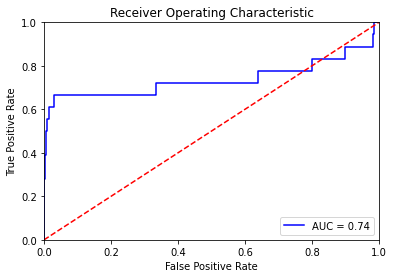

In [ ]:
# calculando el fpr y tpr para todos los thresholds de la clasificación
probs = modelGBC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Elección del método de ML.** 

In [ ]:
mlp_f1=0.008793356130923304
dt_f1=0.2650602409638554
gbc_f1=0.2608695652173913
if_f1=0.05555555555555556
knn_f1=0.0
lr_f1=0.05520169851380042
nbc_f1=0.008479067302596715
rfc_f1= 0.014204545454545456
svm_f1=0.0
mylist=[mlp_f1, dt_f1, gbc_f1, if_f1, knn_f1, lr_f1, nbc_f1, rfc_f1, svm_f1]
best_f1=0.0
for x in mylist:
  a=x
  if a>best_f1:
    best_f1=a
print("El mayor valor de F1 Score está dado para el modelo:")  
if best_f1 == mlp_f1: 
  print("Artificial Neural Network")       
if best_f1 == dt_f1: 
  print("Decision Tree Classifier") 
if best_f1 == gbc_f1: 
  print("Gradient Boosting") 
if best_f1 == if_f1: 
  print("Isolation Forest") 
if best_f1 == knn_f1: 
  print("K-Nearest Neighbors") 
if best_f1 == lr_f1: 
  print("Logistic Regression") 
if best_f1 == nbc_f1: 
  print("Naïve Baiyes Classifier") 
if best_f1 == rfc_f1: 
  print("Random Forest Classifier")    
if best_f1== svm_f1: 
  print("Support Vector Machine")                 

El mayor valor de F1 Score está dado para el modelo:
Decision Tree Classifier


# **Experimento 1: Comparación entre los resultados del Dataset original.**

In [ ]:
df1=df

In [ ]:
# Dividimos los datos en entrenamiento y prueba
df_training = df1.head(int(len(df1) * 0.8))
y_train = df_training['Class']
X_train = df_training.drop('Class', axis=1)
df_test = df.drop(df_training.index)
y_test = df_test['Class']
X_test = df_test.drop('Class', axis=1)
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))
# Mostramos los datos de la columna 'Class' para el conjunto de prueba
y_test.value_counts()

Ejemplos usados para entrenar:  16000
Ejemplos usados para test:  4000


0    3982
1      18
Name: Class, dtype: int64

**Artificial Neural Network**

In [ ]:
model = MLPClassifier(max_iter=100, random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3982
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.7837211897985379
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


**Decision Tree Classifier**

 

In [ ]:
model = DecisionTreeClassifier(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3971
fp :  11
fn :  9
tp :  9
(accuracy_score) =  0.995
(precision_score) =  0.45
(recall_score) =  0.5
(f1_score) =  0.4736842105263158
(auc_score) =  0.7486187845303868
specificity :  0.9972375690607734
sensitivity :  0.5
G-Mean  :  0.706129438934808


**Gradient Boosting** 

In [ ]:
model =GradientBoostingClassifier(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3977
fp :  5
fn :  9
tp :  9
(accuracy_score) =  0.9965
(precision_score) =  0.6428571428571429
(recall_score) =  0.5
(f1_score) =  0.5625000000000001
(auc_score) =  0.7870695909369942
specificity :  0.9987443495730789
sensitivity :  0.5
G-Mean  :  0.7066627022749534


**Isolation Forest**  

In [ ]:
model = IsolationForest(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
import warnings
warnings.filterwarnings('ignore')
p_pred = pipe.predict(X_test)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(y_test.round(), p_pred, pos_label=0)
auc = np.trapz(tpr,fpr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
print("(accuracy_score) =  {}".format(accuracy_score(y_test.round(), model.predict(X_test))))     
p=precision_score(y_test.round(), y_pred,average='binary')
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test.round(), y_pred,average='binary')
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test.round(), y_pred,average='binary')
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  169
fp :  3813
fn :  11
tp :  7
(accuracy_score) =  0.00175
(precision_score) =  0.0018324607329842932
(recall_score) =  0.3888888888888889
(f1_score) =  0.003647733194372069
(auc_score) =  0.7843350633405882
specificity :  0.04244098442993471
sensitivity :  0.3888888888888889
G-Mean  :  0.12847111456785895


**K-Nearest Neighbors**

In [ ]:
model =KNeighborsClassifier()
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3982
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.5
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


**Logistic Regression**

In [ ]:
model =linear_model.LogisticRegression(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3982
fp :  0
fn :  7
tp :  11
(accuracy_score) =  0.99825
(precision_score) =  1.0
(recall_score) =  0.6111111111111112
(f1_score) =  0.7586206896551725
(auc_score) =  0.8061554774261955
specificity :  1.0
sensitivity :  0.6111111111111112
G-Mean  :  0.7817359599705717


**Naïve Baiyes Classifier**

In [ ]:
model =GaussianNB()
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3900
fp :  82
fn :  6
tp :  12
(accuracy_score) =  0.978
(precision_score) =  0.1276595744680851
(recall_score) =  0.6666666666666666
(f1_score) =  0.21428571428571427
(auc_score) =  0.8414322785869747
specificity :  0.9794073329984933
sensitivity :  0.6666666666666666
G-Mean  :  0.8080459281495053


**Random Forest Classifier**

In [ ]:
model = StreamingRFC(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3966
fp :  16
fn :  9
tp :  9
(accuracy_score) =  0.99375
(precision_score) =  0.36
(recall_score) =  0.5
(f1_score) =  0.41860465116279066
(auc_score) =  0.7479909593169262
specificity :  0.9959819186338523
sensitivity :  0.5
G-Mean  :  0.7056847449937728


**Support Vector Machine**         

In [ ]:
model = SVC(probability=True, random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3982
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.6367124281488922
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


# **Experimento 2: Comparación entre los modelos de ML teniendo en cuenta los resultados de los pasos 3 y 4 de la secuencia KDD (sin tratamiento del desbalance).**

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
# Dividimos los datos en entrenamiento y prueba
df_training = df1.head(int(len(df1) * 0.8))
y_train = df_training['Class']
X_train = df_training.drop('Class', axis=1)
df_test = df.drop(df_training.index)
y_test = df_test['Class']
X_test = df_test.drop('Class', axis=1)
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))
# Mostramos los datos de la columna 'Class' para el conjunto de prueba
y_test.value_counts()

Ejemplos usados para entrenar:  15924
Ejemplos usados para test:  4076


0    4058
1      18
Name: Class, dtype: int64

**Artificial Neural Network**

In [ ]:
model = MLPClassifier(max_iter=100, random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4058
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955839057899902
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.496057171020207
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


**Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4047
fp :  11
fn :  9
tp :  9
(accuracy_score) =  0.9950932286555446
(precision_score) =  0.45
(recall_score) =  0.5
(f1_score) =  0.4736842105263158
(auc_score) =  0.7486446525381961
specificity :  0.9972893050763924
sensitivity :  0.5
G-Mean  :  0.706147755457876


**Gradient Boosting**

In [ ]:
model =GradientBoostingClassifier(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4041
fp :  17
fn :  9
tp :  9
(accuracy_score) =  0.9936211972522081
(precision_score) =  0.34615384615384615
(recall_score) =  0.5
(f1_score) =  0.40909090909090906
(auc_score) =  0.8067945348009419
specificity :  0.99581074420897
sensitivity :  0.5
G-Mean  :  0.7056241011363522


**Isolation Forest**

In [ ]:
model = IsolationForest(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
import warnings
warnings.filterwarnings('ignore')
p_pred = pipe.predict(X_test)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(y_test.round(), p_pred, pos_label=0)
auc = np.trapz(tpr,fpr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
print("(accuracy_score) =  {}".format(accuracy_score(y_test.round(), model.predict(X_test))))     
p=precision_score(y_test.round(), y_pred,average='binary')
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test.round(), y_pred,average='binary')
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test.round(), y_pred,average='binary')
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  147
fp :  3911
fn :  11
tp :  7
(accuracy_score) =  0.0017173699705593719
(precision_score) =  0.0017866258295048494
(recall_score) =  0.3888888888888889
(f1_score) =  0.0035569105691056913
(auc_score) =  0.7874431849296315
specificity :  0.0362247412518482
sensitivity :  0.3888888888888889
G-Mean  :  0.11869035081133911


**K-Nearest Neighbors**

In [ ]:
model = KNeighborsClassifier()
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)    

tn :  4058
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955839057899902
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.5
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


**Logistic Regression**

In [ ]:
model = linear_model.LogisticRegression(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4058
fp :  0
fn :  9
tp :  9
(accuracy_score) =  0.9977919528949951
(precision_score) =  1.0
(recall_score) =  0.5
(f1_score) =  0.6666666666666666
(auc_score) =  0.8228738842341602
specificity :  1.0
sensitivity :  0.5
G-Mean  :  0.7071067811865476


**Naïve Baiyes Classifier**

In [ ]:
model = GaussianNB()
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3961
fp :  97
fn :  6
tp :  12
(accuracy_score) =  0.9747301275760549
(precision_score) =  0.11009174311926606
(recall_score) =  0.6666666666666666
(f1_score) =  0.18897637795275593
(auc_score) =  0.839521384371064
specificity :  0.9760965993100049
sensitivity :  0.6666666666666666
G-Mean  :  0.8066790354327239


**Random Forest Classifier**

In [ ]:
model = StreamingRFC(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4040
fp :  18
fn :  9
tp :  9
(accuracy_score) =  0.9933758586849852
(precision_score) =  0.3333333333333333
(recall_score) =  0.5
(f1_score) =  0.4
(auc_score) =  0.7477821586988664
specificity :  0.9955643173977329
sensitivity :  0.5
G-Mean  :  0.7055367876297213


**Support Vector Machine**

In [ ]:
model = SVC(probability=True, random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  4058
fp :  0
fn :  18
tp :  0
(accuracy_score) =  0.9955839057899902
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.37492470291878865
specificity :  1.0
sensitivity :  0.0
G-Mean  :  0.0


# **Experimento 3: Comparación entre los modelos de ML tras aplicar SMOTE.**

In [ ]:
#SMOTE: Synthetic Minority Oversampling Technique
counter=Counter(y_train)
print('Antes', counter)
# oversampling the train dataset using SMOTE
smt=SMOTE(random_state=0)
# X_train, y_train=smt.fit_resample(X_train, y_train) 
X_train_sm, y_train_sm=smt.fit_resample(X_train, y_train) 

counter=Counter(y_train_sm)
print('Después', counter)

Antes Counter({0: 15878, 1: 46})
Después Counter({0: 15878, 1: 15878})


**Artificial Neural Network**

In [ ]:
model = MLPClassifier(max_iter=100, random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4054
fp :  4
fn :  9
tp :  9
(accuracy_score) =  0.996810598626104
(precision_score) =  0.6923076923076923
(recall_score) =  0.5
(f1_score) =  0.5806451612903226
(auc_score) =  0.811216527024807
specificity :  0.9990142927550517
sensitivity :  0.5
G-Mean  :  0.7067581951258336


**Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4046
fp :  12
fn :  10
tp :  8
(accuracy_score) =  0.9946025515210991
(precision_score) =  0.4
(recall_score) =  0.4444444444444444
(f1_score) =  0.4210526315789474
(auc_score) =  0.7207436613547998
specificity :  0.9970428782651553
sensitivity :  0.4444444444444444
G-Mean  :  0.6656802296281953


**Gradient Boosting**

In [ ]:
model =GradientBoostingClassifier(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  3978
fp :  80
fn :  7
tp :  11
(accuracy_score) =  0.9786555446516192
(precision_score) =  0.12087912087912088
(recall_score) =  0.6111111111111112
(f1_score) =  0.20183486238532108
(auc_score) =  0.8418761294562181
specificity :  0.9802858551010349
sensitivity :  0.6111111111111112
G-Mean  :  0.7739919754863736


**Isolation Forest**

In [ ]:
model = IsolationForest(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
import warnings
warnings.filterwarnings('ignore')
p_pred = pipe.predict(X_test)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(y_test.round(), p_pred, pos_label=0)
auc = np.trapz(tpr,fpr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
print("(accuracy_score) =  {}".format(accuracy_score(y_test.round(), model.predict(X_test))))     
p=precision_score(y_test.round(), y_pred,average='binary')
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test.round(), y_pred,average='binary')
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test.round(), y_pred,average='binary')
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean) 

tn :  153
fp :  3905
fn :  9
tp :  9
(accuracy_score) =  0.002208047105004907
(precision_score) =  0.0022994379151762903
(recall_score) =  0.5
(f1_score) =  0.004577822990844354
(auc_score) =  0.7311483489403647
specificity :  0.037703302119270574
sensitivity :  0.5
G-Mean  :  0.13730131485035127


**K-Nearest Neighbors**

In [ ]:
model = KNeighborsClassifier()
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)  

tn :  4051
fp :  7
fn :  18
tp :  0
(accuracy_score) =  0.9938665358194309
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.49704287826515525
specificity :  0.9982750123213405
sensitivity :  0.0
G-Mean  :  0.0


**Logistic Regression**

In [ ]:
model = linear_model.LogisticRegression(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  3618
fp :  440
fn :  5
tp :  13
(accuracy_score) =  0.8908243375858685
(precision_score) =  0.02869757174392936
(recall_score) =  0.7222222222222222
(f1_score) =  0.05520169851380042
(auc_score) =  0.7885247248233941
specificity :  0.8915722030556925
sensitivity :  0.7222222222222222
G-Mean  :  0.8024420588194793


**Naïve Baiyes Classifier**

In [ ]:
model = GaussianNB()
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  3875
fp :  183
fn :  6
tp :  12
(accuracy_score) =  0.953631010794897
(precision_score) =  0.06153846153846154
(recall_score) =  0.6666666666666666
(f1_score) =  0.11267605633802817
(auc_score) =  0.8625349104649253
specificity :  0.9549038935436176
sensitivity :  0.6666666666666666
G-Mean  :  0.797873796847437


**Random Forest Classifier**

In [ ]:
model = StreamingRFC(random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)     

tn :  3965
fp :  93
fn :  7
tp :  11
(accuracy_score) =  0.9754661432777233
(precision_score) =  0.10576923076923077
(recall_score) =  0.6111111111111112
(f1_score) =  0.18032786885245902
(auc_score) =  0.7940967088330322
specificity :  0.9770823065549532
sensitivity :  0.6111111111111112
G-Mean  :  0.7727262477784773


**Support Vector Machine**

In [ ]:
model = SVC(probability=True,random_state=0)
operations =  [('model', model)] 
pipe = Pipeline(operations) 
pipe.fit(X_train_sm, y_train_sm)
pipe_pred = pipe.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
auc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
tn, fp, fn, tp = confusion_matrix(y_test, pipe_pred).ravel()
print('tn : ', tn)
print('fp : ', fp)
print('fn : ', fn)
print('tp : ', tp)
a=accuracy_score(y_test, model.predict(X_test))
print("(accuracy_score) =  {}".format(a))     
p=precision_score(y_test, model.predict(X_test))  
print("(precision_score) =  {}".format(p))   
r=recall_score(y_test, model.predict(X_test))
print("(recall_score) =  {}".format(r))   
f1=f1_score(y_test, model.predict(X_test))
print("(f1_score) =  {}".format(f1))   
print("(auc_score) =  {}".format(auc))   
specificity = tn / (tn+fp)
print('specificity : ', specificity)
sensitivity = tp / (tp+fn)
print('sensitivity : ', sensitivity)  
G_Mean= np.sqrt(sensitivity * specificity)
print('G-Mean  : ', G_Mean)   

tn :  4028
fp :  30
fn :  18
tp :  0
(accuracy_score) =  0.9882237487733072
(precision_score) =  0.0
(recall_score) =  0.0
(f1_score) =  0.0
(auc_score) =  0.38728711461584797
specificity :  0.9926071956628881
sensitivity :  0.0
G-Mean  :  0.0


# **Experimento 4: Comparación entre los modelos de ML teniendo en cuenta los ajustes en los parámetros después del GridSearchCV.**

Los siguientes resultados fueron obtenidos tras realizar un GridSearchCV() para buscar los mejores parámetros de cada algoritmo y ajustarlos.

**Artificial Neural Network**

(accuracy_score) =  0.004416094210009814

(precision_score) =  0.004416094210009814

(recall_score) =  1.0

(f1_score) =  0.008793356130923304

(auc_score) =  0.5

specificity :  0.0

sensitivity :  1.0

G-Mean  :  0.0

**Decision Tree Classifier**

(accuracy_score) =  0.9850343473994112

(precision_score) =  0.16923076923076924

(recall_score) =  0.6111111111111112

(f1_score) =  0.2650602409638554

(auc_score) =  0.8004832703575927

specificity :  0.9866929521931986

sensitivity :  0.6111111111111112

G-Mean  :  0.7765172414958268

**Gradient Boosting**

(accuracy_score) =  0.995829244357213

(precision_score) =  0.6

(recall_score) =  0.16666666666666666

(f1_score) =  0.2608695652173913

(auc_score) =  0.7385137725206724

specificity :  0.9995071463775259

sensitivity :  0.16666666666666666

G-Mean  :  0.4081476747407172

**Isolation Forest**

(accuracy_score) =  0.0017173699705593719

(precision_score) =  0.0291005291005291

(recall_score) =  0.6111111111111112

(f1_score) =  0.05555555555555556

(auc_score) =  0.23966376430644545

specificity :  0.909561360275998

sensitivity :  0.6111111111111112

G-Mean  :  0.7455488270408578

**K-Nearest Neighbors**

(accuracy_score) =  0.9955839057899902

(precision_score) =  0.0

(recall_score) =  0.0

(f1_score) =  0.0

(auc_score) =  0.5

specificity :  1.0

sensitivity :  0.0

G-Mean  :  0.0



**Logistic Regression**

(accuracy_score) =  0.8908243375858685

(precision_score) =  0.02869757174392936

(recall_score) =  0.7222222222222222

(f1_score) =  0.05520169851380042

(auc_score) =  0.7885247248233941

specificity :  0.8915722030556925

sensitivity :  0.7222222222222222

G-Mean  :  0.8024420588194793

**Naïve Baiyes Classifier**

(accuracy_score) =  0.08194308145240432

(precision_score) =  0.004259850905218318

(recall_score) =  0.8888888888888888

(f1_score) =  0.008479067302596715

(auc_score) =  0.41740594710037787

specificity :  0.07836372597338591

sensitivity :  0.8888888888888888

G-Mean  :  0.2639254540768593

**Random Forest Classifier**

(accuracy_score) =  0.4892051030421982


(precision_score) =  0.0071633237822349575


(recall_score) =  0.8333333333333334


(f1_score) =  0.014204545454545456


(auc_score) =  0.8222851979628717


specificity :  0.48767865943814687


sensitivity :  0.8333333333333334


G-Mean  :  0.6374942218288119

**Support Vector Machine**

(accuracy_score) =  0.9955839057899902

(precision_score) =  0.0

(recall_score) =  0.0

(f1_score) =  0.0

(auc_score) =  0.48706259241005423

specificity :  1.0

sensitivity :  0.0

G-Mean  :  0.0